# Lecture 7

In this lecture we focus on visualizing the distribution of data. 

In [1]:
from datascience import *
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

# Charts Review

In [3]:
hybrid = Table.read_table('data/hybrid.csv')
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


In [4]:
most_fuel_efficient = hybrid.sort('mpg', descending = True).take(0)
# first argument is column name, stored as a string
# second and third arguments are optional
# know how to use descending = True or descending = False
# sorted by mpg, greatest to smallest
# want to show the top row, row in position 0
type(most_fuel_efficient)

datascience.tables.Table

In [5]:
hybrid.where('mpg', are.above(70))

vehicle,year,msrp,acceleration,mpg,class
Prius alpha (V),2011,30588.3,10,72.92,Midsize


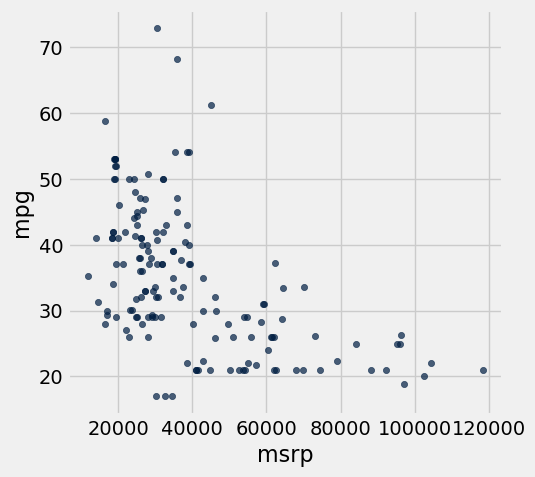

In [6]:
hybrid.scatter('msrp', 'mpg') # the more expensive hybrid cars are less fuel efficient
# and we have a couple of more reasonably priced hybrid cars that are very fuel efficient

Excercise: Plot the first 5 hybrid car names vs the mpg

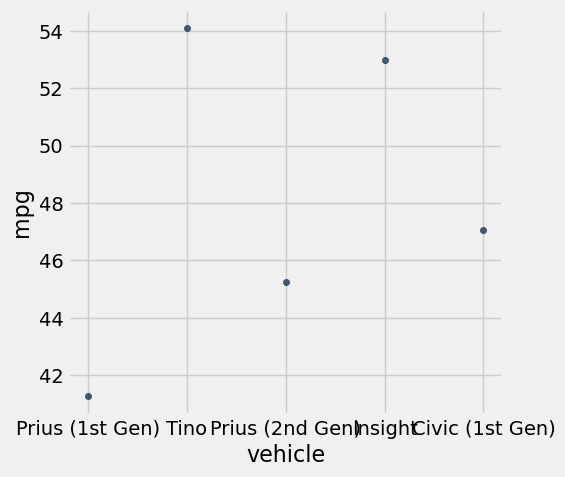

In [7]:
first_5 = hybrid.take(make_array(0,1,2,3,4))
first_5.scatter('vehicle', 'mpg')

--- 

## Categorical Distribution 

How often does each possible value occur? There are a finite set of values and so we can visualize those counts as a bar chart.

Using the top movies data from the previous lecture.

In [8]:
top_movies = Table.read_table('data/top_movies_2017.csv')
top_movies#.where('Studio','MGM')

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


**Exercise:** Compute how many times does each studio appears in the list.  (Here we use the `group` function which we cover in more detail next week. [Data8 Reference Page](https://www.data8.org/sp23/reference/))

In [9]:
my_pets = make_array("Cat", "Dog", "Dog", "Bird", "Cat", "Dog", "Cat")
toy = Table().with_columns("Pets", my_pets)
# toy = Table().with_columns("Pets", make_array("Cat", "Dog", "Dog", "Bird", "Cat", "Dog", "Cat"))

toy

Pets
Cat
Dog
Dog
Bird
Cat
Dog
Cat


In [10]:
# visually inspecting, i can count how many of each type of pet i have
# 3 cats
# 3 dogs
# 1 bird

In [11]:
toy.group('Pets')

Pets,count
Bird,1
Cat,3
Dog,3


In [12]:
# how many buena vista movies are in our table?
top_movies.where('Studio', 'Buena Vista').num_rows

35

In [13]:
top_movies.select('Studio').group('Studio').take(1).column('count').item(0)
# .column extracts the column as an array
# .item(0) grabs the element in the array, in position 0 (first thing)

35

In [14]:
studio_counts = top_movies.select('Studio').group('Studio')#.sort('count', descending = True)
studio_counts # total number of times each studio appears in data set
# in other words, how many movies from given studio, is represented in this data set

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


**Exercise:** Construct a bar chart depicting the number of movies from each studio (the `"count"`).

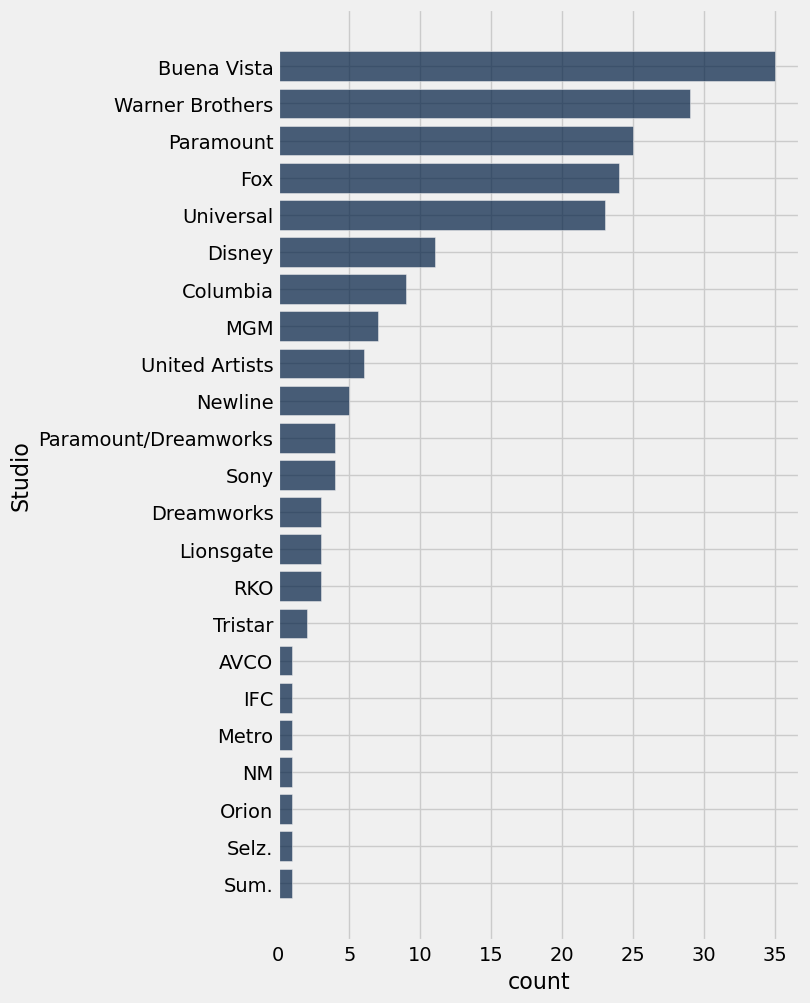

In [15]:
(studio_counts
 .sort('count', descending = True)
 .barh('Studio', 'count'))

**Exercise:** Construct a bar chart containing the percentage of the movies from each studio.

In [16]:
# can we sum up the total counts from studio_counts?
# it should be 200 movies
# extract count column as an array, using .column

# apply sum to that array
studio_counts.select('count').num_rows # this gives us number of unique studios
studio_counts_array = studio_counts.column('count')
sum(studio_counts_array)

#studio_counts.with_column(

200

In [17]:
percentage_movies = studio_counts_array / 200 * 100
percentage_movies

array([  0.5,  17.5,   4.5,   5.5,   1.5,  12. ,   0.5,   1.5,   3.5,
         0.5,   0.5,   2.5,   0.5,  12.5,   2. ,   1.5,   0.5,   2. ,
         0.5,   1. ,   3. ,  11.5,  14.5])

In [18]:
studio_counts.with_column('Percentage', percentage_movies)#.column('Percentage')

percentage_array = studio_counts.with_column('Percentage', percentage_movies).column('Percentage')
sum(percentage_array)

100.0

**Question:**
I attempted to construct a bar chart depicting the top 10 movies from each studio (the `"share"`).
- Where did I go wrong?
- Is this a distribution of my data?

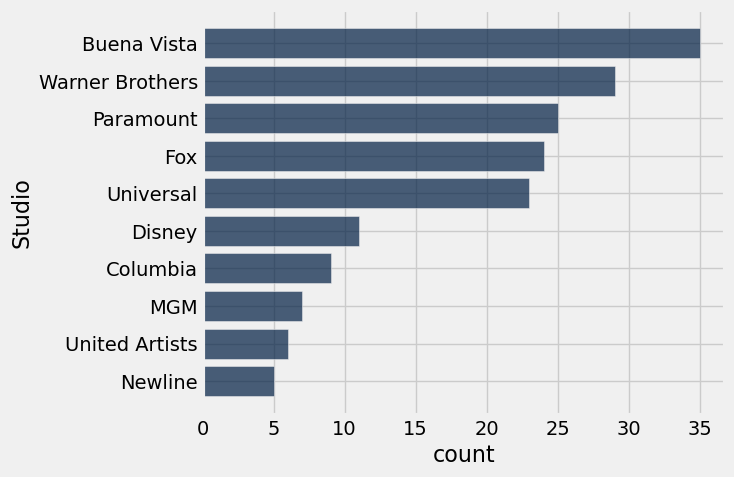

In [19]:
(
    studio_counts
    .sort('count', descending=True) # sort greatest to smallest
    .take(np.arange(10)) # take top 10
    .barh('Studio', 'count') # barchart, categorical: studio name, numerical: count
)

---

<center> Return to Slides </center>

---

## Distributions of Numerical Data

The most basic tool for visualizing the **distribution** of numerical data is the histogram. 

In this part of the demo, we are going to examine the age of the top 200 films. 

In [20]:
np.arange(5) # generates an array with 5 elements, starting with 0

array([0, 1, 2, 3, 4])

In [21]:
top_movies.take(np.arange(5)) # just a preview 
# or
# top_movies.take(make_array(0,1,2,3,4))

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997


**Exercise:** Add a column containing the age of each movie to the `top_movies` table.

In [22]:
this_year = 2024
ages = this_year - top_movies.column('Year') # 2024 - each year in Year column, ages is an array with that difference
top_movies = top_movies.with_column('Age', ages) # added new column Ages, with ages array
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,85
Star Wars,Fox,460998007,1583483200,1977,47
The Sound of Music,Fox,158671368,1266072700,1965,59
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,42
Titanic,Paramount,658672302,1204368000,1997,27
The Ten Commandments,Paramount,65500000,1164590000,1956,68
Jaws,Universal,260000000,1138620700,1975,49
Doctor Zhivago,MGM,111721910,1103564200,1965,59
The Exorcist,Warner Brothers,232906145,983226600,1973,51
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,87


In [23]:
top_movies.sort('Age', descending = False)

Title,Studio,Gross,Gross (Adjusted),Year,Age
Beauty and the Beast (2017),Buena Vista,504014165,504014165,2017,7
Wonder Woman,Warner Brothers,406381596,406381596,2017,7
Guardians of the Galaxy Vol. 2,Buena Vista,389397196,389397196,2017,7
Rogue One: A Star Wars Story,Buena Vista,532177324,537326000,2016,8
Finding Dory,Buena Vista,486295561,499245400,2016,8
Captain America: Civil War,Buena Vista,408084349,415654000,2016,8
The Secret Life of Pets,Universal,368384330,384704200,2016,8
Deadpool,Fox,363070709,375984600,2016,8
The Jungle Book (2016),Buena Vista,364001123,370808400,2016,8
Zootopia,Buena Vista,341268248,352098200,2016,8


**Exercise:** Split the `"Age"` column into the following bins

In [24]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 103) # 7 bins
# with intervals [0, 5), [5, 10), [15, 25), [25, 40), [40, 65), [65, 103)

In [25]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,0
5,18
10,15
15,42
25,43
40,59
65,23
103,0


You can also use `np.arange` to create regular bins of a fixed size or even just specify a number.

---

<center> Return to Slides </center>

---

## Histograms 

We can construct histograms of numerical variables by calling `tbl.hist(...)` function using our `bins`.

**Exercise:** Make a histogram of `"Age"` using `my_bins`. 

**Exercise:** Same thing as before but with equally spaced bins.

**Exercise:** Same thing as before but we specify the number of bins

**Exercise:** Same thing as before but we don't specify the bins

Using the interactive plotting tools:

## Exploring Data Distributions

**Exercise:** Make a histogram of the `"Gross (Adjusted)"` revenue for all the movies.

**Exercise:** Examine the distribution of dates for `"Disney"` and `"Buena Vista"`.

---

<center> Return to Slides </center>

---

## Height 
Lets compute the heights for the bars using our bins from before:

bin,Age count
0,0
5,18
10,15
15,42
25,43
40,59
65,23
103,0


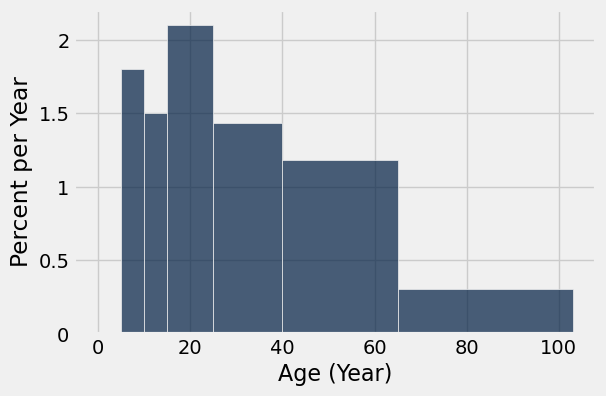

In [26]:
top_movies.hist('Age', bins=my_bins, unit='Year')
binned_data

**Exercise:** Add a column containing the percentage of data in each bin.

**Exercise:** Compute the height of all the bins in binned data.

\begin{align}
\text{Area} =  \text{Width}\,\, \times  \,\, \text{Height} \quad \rightarrow \quad
\text{Height} =  \frac{\text{Area}}{ \text{Width}}
\end{align}

In [27]:
binned_data

bin,Age count
0,0
5,18
10,15
15,42
25,43
40,59
65,23
103,0


Restrict the table to just the left side bins by dropping the last row.  I will call this `bi` (for bin intervals) since we are going to be typing it a lot.

In [28]:
bi = (
    
)
bi

()

Create an array of the right side of the bins by dropping the first row.

In [29]:
right_bins = (

)
right_bins

()

Assemble the bi (Bin Interval) table by computing the width and the height of each column.

In [32]:
Table.group?

Signature: Table.group(self, column_or_label, collect=None)
Docstring:
Group rows by unique values in a column; count or aggregate others.

Args:
    ``column_or_label``: values to group (column label or index, or array)

    ``collect``: a function applied to values in other columns for each group

Returns:
    A Table with each row corresponding to a unique value in ``column_or_label``,
    where the first column contains the unique values from ``column_or_label``, and the
    second contains counts for each of the unique values. If ``collect`` is
    provided, a Table is returned with all original columns, each containing values
    calculated by first grouping rows according to ``column_or_label``, then applying
    ``collect`` to each set of grouped values in the other columns.

Note:
    The grouped column will appear first in the result table. If ``collect`` does not
    accept arguments with one of the column types, that column will be empty in the resulting
    table.

>>> mar

In [34]:
top_movies.group('Year', np.average)
# grouped by Year, each row is a unique Year category
# we apply the function np.average to the rest of the table 


Year,Title average,Studio average,Gross average,Gross (Adjusted) average,Age average
1921,,,9.18367e+06,4.08214e+08,103
1937,,,1.84925e+08,9.6901e+08,87
1939,,,1.98676e+08,1.79618e+09,85
1940,,,8.42542e+07,5.99216e+08,84
1941,,,4.6385e+07,5.83036e+08,83
1942,,,1.02247e+08,5.66404e+08,82
1945,,,2.13333e+07,5.57804e+08,79
1946,,,2.20291e+07,4.71261e+08,78
1950,,,9.31411e+07,5.3608e+08,74
1952,,,3.6e+07,5.334e+08,72


In [37]:
top_movies.with_columns('Title', 'Age')
# .with_column('name of my new column', values i should enter into new column usually an array)

Title,Studio,Gross,Gross (Adjusted),Year,Age
Age,MGM,198676459,1796176700,1939,85
Age,Fox,460998007,1583483200,1977,47
Age,Fox,158671368,1266072700,1965,59
Age,Universal,435110554,1261085000,1982,42
Age,Paramount,658672302,1204368000,1997,27
Age,Paramount,65500000,1164590000,1956,68
Age,Universal,260000000,1138620700,1975,49
Age,MGM,111721910,1103564200,1965,59
Age,Warner Brothers,232906145,983226600,1973,51
Age,Disney,184925486,969010000,1937,87


In [38]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,85
Star Wars,Fox,460998007,1583483200,1977,47
The Sound of Music,Fox,158671368,1266072700,1965,59
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,42
Titanic,Paramount,658672302,1204368000,1997,27
The Ten Commandments,Paramount,65500000,1164590000,1956,68
Jaws,Universal,260000000,1138620700,1975,49
Doctor Zhivago,MGM,111721910,1103564200,1965,59
The Exorcist,Warner Brothers,232906145,983226600,1973,51
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,87


In [39]:
top_movies.group([ 'Year', 'Studio'], np.mean)


Year,Studio,Title mean,Gross mean,Gross (Adjusted) mean,Age mean
1921,Metro,,9.18367e+06,4.08214e+08,103
1937,Disney,,1.84925e+08,9.6901e+08,87
1939,MGM,,1.98676e+08,1.79618e+09,85
1940,Disney,,8.42542e+07,5.99216e+08,84
1941,Disney,,7.64081e+07,7.38256e+08,83
1941,Warner Brothers,,1.63619e+07,4.27815e+08,83
1942,RKO,,1.02247e+08,5.66404e+08,82
1945,RKO,,2.13333e+07,5.57804e+08,79
1946,RKO,,2.365e+07,4.8895e+08,78
1946,Selz.,,2.04082e+07,4.53571e+08,78
